In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [130]:
IMG_SIZE = [224,224]

train_path = 'Projects\Road\Datasets\train'
valid_path = 'Projects\Road\Datasets\test'

In [131]:
base_model = MobileNetV2(input_shape=IMG_SIZE + [3], include_top=False, weights='imagenet')

In [132]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [133]:
base_model.trainable = False

In [135]:
x = Flatten()(base_model.output)

prediction = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs= prediction)

In [136]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [137]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [138]:
train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range=0.2,
zoom_range=0.2,
width_shift_range=0.2,
height_shift_range=0.2,
horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale= 1./255)

In [139]:
train_set = train_datagen.flow_from_directory(r'C:\Users\Asus\Desktop\ML (self work)\Deep Learning\Projects\Road\Datasets\train',target_size=(224,224),batch_size=32,class_mode='categorical')


Found 180 images belonging to 2 classes.


In [140]:
test_set = test_datagen.flow_from_directory(r'C:\Users\Asus\Desktop\ML (self work)\Deep Learning\Projects\Road\Datasets\test', batch_size=32, target_size=(224,224), class_mode='categorical')

Found 55 images belonging to 2 classes.


In [141]:
history = model.fit(
    train_set, 
    validation_data=test_set, 
    epochs = 10, 
    steps_per_epoch=len(train_set), 
    validation_steps=len(test_set)
)

Epoch 1/10
6/6 [==============================] - 12s 2s/step - loss: 0.6556 - accuracy: 0.8389 - val_loss: 0.6605 - val_accuracy: 0.9455
Epoch 2/10
6/6 [==============================] - 9s 1s/step - loss: 0.1628 - accuracy: 0.9889 - val_loss: 0.9743 - val_accuracy: 0.9273
Epoch 3/10
6/6 [==============================] - 9s 1s/step - loss: 0.2418 - accuracy: 0.9778 - val_loss: 2.2835 - val_accuracy: 0.8364
Epoch 4/10
6/6 [==============================] - 9s 2s/step - loss: 0.4534 - accuracy: 0.9667 - val_loss: 1.3493 - val_accuracy: 0.8909
Epoch 5/10
6/6 [==============================] - 9s 1s/step - loss: 0.4109 - accuracy: 0.9389 - val_loss: 1.3721 - val_accuracy: 0.8727
Epoch 6/10
6/6 [==============================] - 9s 1s/step - loss: 0.5960 - accuracy: 0.9611 - val_loss: 2.6338 - val_accuracy: 0.8909
Epoch 7/10
6/6 [==============================] - 9s 1s/step - loss: 0.0449 - accuracy: 0.9944 - val_loss: 1.0798 - val_accuracy: 0.9455
Epoch 8/10
6/6 [========================

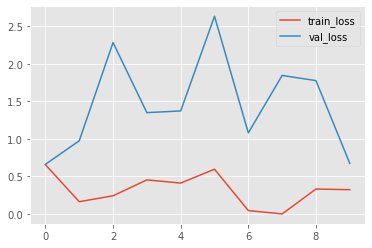

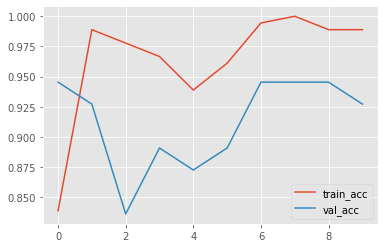

In [142]:
# Plot the loss
plt.plot(history.history['loss'],label = 'train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(history.history['accuracy'],label='train_acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

In [212]:
model.save('Road_Classification.h5')

C:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [10]:
model = tf.keras.models.load_model("Road_Classification.h5")

In [11]:
import cv2 as op

Clean Road
100.0 %


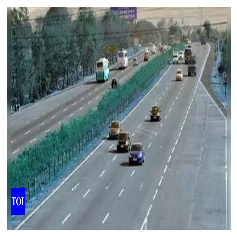

In [37]:
IMG_DIR = r'C:\Users\Asus\Desktop\ML (self work)\Deep Learning\Projects\Road\Evaluate\10.jpg'

img = op.imread(IMG_DIR)
img = op.resize(img, (224,224))
img = img/255
img_pred = img.reshape(1,224,224,3)

plt.matshow(img)
plt.axis("off")

pred = model.predict(img_pred)
pred_argmax = np.argmax(pred)
prediction = "Clean Road" if pred_argmax == 0 else "Dirty Road"
print(prediction)
print(np.max(pred)*100, "%")